#**Shipping Courier in Indonesia**

##Task
Mini Project How to Optimize Performance from Non-Delayed into Super On-Time Process for Shipping Courier in Indonesia

## Dataset Information
Data Dictionary! (shipping)
*   ID: Customer Serial Number
*   Expedition: Shipping Company
*   Mode of Shipment: The transportation method used for shipping goods
*   Customer Care Calls: The number of calls made by the customer during the shipping process
*   Customer Rating: The rating given by the customer, with 1 being the worst rating and 5 being the best rating
*   Cost of the Product: The shipping cost in IDR (Indonesian Rupiah)
*   Prior Purchases: The number of previous orders made
*   Product Importance: The product category based on its importance (low, medium, high)
*   Gender: The gender of the customer
*   Discount Offered: The discount on the product price that was obtained
*   Weight in Grams: The weight of the product in grams
*   Reached on Time: 1 indicates that the shipment was late, and 0 indicates that the shipment arrived on time.
*   Province Code: Province Code
*   Province: The destination province for the shipment of the goods

## Import Data

In [79]:
# pip install pandas
# pip install numpy
# pip install datetime
# pip install seaborn
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Import data from the computer
from google.colab import files
import io
uploaded = files.upload()

Saving shipping.xlsx to shipping.xlsx


In [51]:
df = pd.read_excel(io.BytesIO(uploaded['shipping.xlsx']))
df

,ID,Expedition,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Province_Code,Province
0,1,Ninja Express,Flight,4,2,2542428,3,low,F,632016,1233,1,29,Bengkulu
1,2,JNE,Flight,4,5,3102624,2,low,M,847476,3088,1,11,Kalimantan Selatan
2,3,SiCepat,Flight,2,2,2628612,4,low,M,689472,3374,1,22,Sulawesi Tengah
3,4,TIKI,Flight,3,3,2528064,4,medium,M,143640,1177,1,33,Sulawesi Selatan
4,5,J&T,Flight,2,2,2642976,3,medium,F,660744,2484,1,33,Sulawesi Selatan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,SiCepat,Ship,4,1,3619728,5,medium,F,14364,1538,1,14,DKI Jakarta
10995,10996,TIKI,Ship,4,1,3332448,5,medium,F,86184,1247,0,13,Kalimantan Utara
10996,10997,J&T,Ship,5,4,3476088,5,low,F,57456,1155,0,23,Bangka Belitung
10997,10998,JNE,Ship,5,2,3203172,6,medium,M,28728,1210,0,15,Jawa Tengah


## Data Cleaning

In [52]:
# Check missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Exploratory Data Analysis (EDA)

In [53]:
# Total rows, columns in the dataset
df.shape

(10999, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Expedition           10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_time      10999 non-null  int64 
 12  Province_Code        10999 non-null  int64 
 13  Province             10999 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.2+ MB


In [55]:
df['Customer_rating'] = df['Customer_rating'].apply(str)
df['Customer_rating'].describe()

count     10999
unique        5
top           3
freq       2239
Name: Customer_rating, dtype: object

In [56]:
df['Reached_on_time'] = df['Reached_on_time'].apply(str)
df['Reached_on_time'].describe()

count     10999
unique        2
top           1
freq       6563
Name: Reached_on_time, dtype: object

In [57]:
df['Province_Code'] = df['Province_Code'].apply(str)
df['Province_Code'].describe()

count     10999
unique       34
top          14
freq        354
Name: Province_Code, dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Expedition           10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  object
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_time      10999 non-null  object
 12  Province_Code        10999 non-null  object
 13  Province             10999 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.2+ MB


## Descriptive statistics dataset

In [59]:
categoricals = ['Expedition', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached_on_time', 'Province_Code', 'Province']
numericals = ['ID', 'Customer_care_calls', 'Cost_of_the_Product',  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

In [60]:
df[numericals].describe()

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,1.099900e+04,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,3.019267e+06,3.567597,192092.870988,3634.016729
std,3175.28214,1.141490,6.903808e+05,1.522860,232776.190986,1635.377251
min,1.00000,2.000000,1.378944e+06,2.000000,14364.000000,1001.000000
25%,2750.50000,3.000000,2.427516e+06,3.000000,57456.000000,1839.500000
50%,5500.00000,4.000000,3.073896e+06,3.000000,100548.000000,4149.000000
75%,8249.50000,5.000000,3.605364e+06,4.000000,143640.000000,5050.000000
max,10999.00000,7.000000,4.452840e+06,10.000000,933660.000000,7846.000000


In [61]:
df[categoricals].describe()

,Expedition,Mode_of_Shipment,Customer_rating,Product_importance,Gender,Reached_on_time,Province_Code,Province
count,10999,10999,10999,10999,10999,10999,10999,10999
unique,5,3,5,3,2,2,34,34
top,JNE,Ship,3,low,F,1,14,DKI Jakarta
freq,3666,7462,2239,5297,5545,6563,354,354


In [62]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Expedition column
JNE              3666
Ninja Express    1834
SiCepat          1833
TIKI             1833
J&T              1833
Name: Expedition, dtype: int64 

Value counts of Mode_of_Shipment column
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64 

Value counts of Customer_rating column
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64 

Value counts of Product_importance column
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64 

Value counts of Gender column
F    5545
M    5454
Name: Gender, dtype: int64 

Value counts of Reached_on_time column
1    6563
0    4436
Name: Reached_on_time, dtype: int64 

Value counts of Province_Code column
14    354
16    351
6     347
18    345
15    345
27    344
24    343
2     343
21    341
33    340
5     337
12    334
17    332
34    331
20    330
30    329
11    324
7     323
25    322
28    321
3     319
32    317
22    313
1

## Analysis & Data visualization

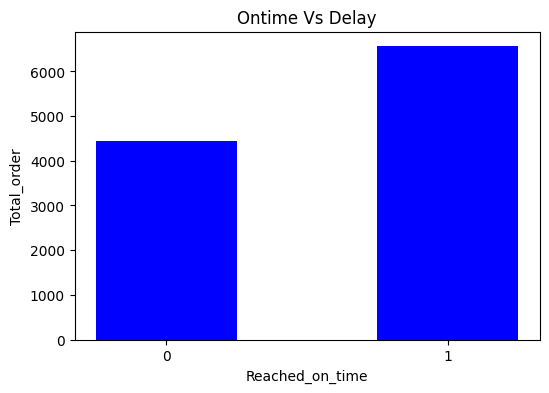

In [63]:
df_status_summary = df.groupby('Reached_on_time', as_index=False).agg(id_cnt=('ID','nunique'))
fig = plt.figure(figsize=(6, 4))
plt.bar(df_status_summary['Reached_on_time'], df_status_summary['id_cnt'],
        color='blue', width=0.5)
plt.xlabel('Reached_on_time')
plt.ylabel('Total_order')
plt.title('Ontime Vs Delay')
plt.show()

Delays in delivery occur more often than on-time delivery

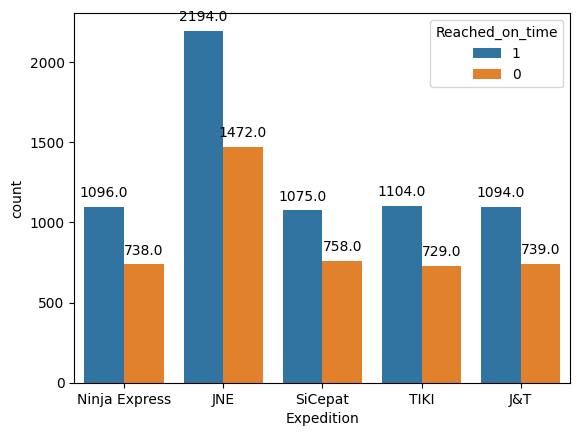

In [64]:
ax = sns.countplot(data=df, x='Expedition', hue='Reached_on_time')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Of the 5 deliveries, it can be seen that JNE has the highest delays because JNE is also the delivery that is most widely used

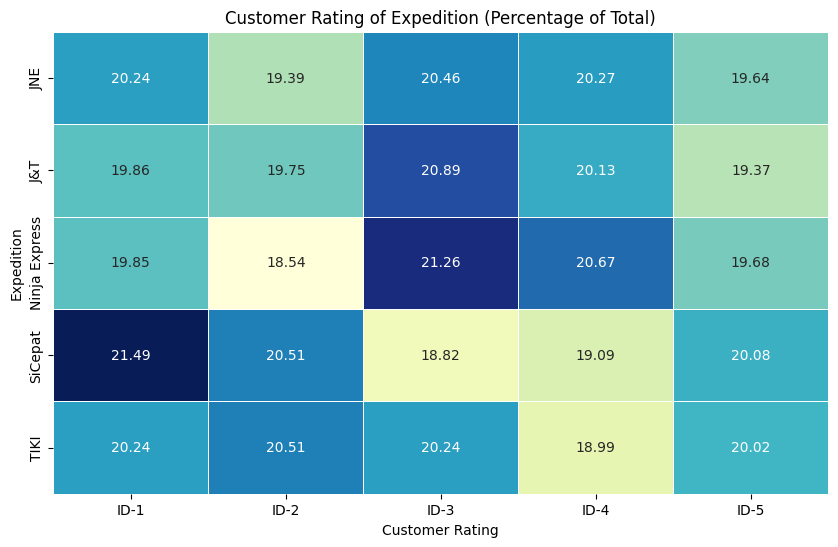

In [65]:
# Create a DataFrame df_Customer_rating
df_Customer_rating = pd.pivot_table(df, index='Expedition',
               columns='Customer_rating', values=['ID'],
               aggfunc={'ID': pd.Series.nunique},
               fill_value=0)
# Counts the total number of unique IDs for each Expedition
expedition_total = df_Customer_rating.sum(axis=1)

# Calculates the percentage of the total for each cell in the pivot table
pivot_table_percentage = (df_Customer_rating.T / expedition_total * 100).T

# Sort pivot table rows based on highest to lowest total percentage
pivot_table_percentage = pivot_table_percentage.reindex(pivot_table_percentage.sum(axis=1).sort_values(ascending=False).index, axis=0)

# Create a heatmap
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
sns.heatmap(pivot_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar=False)

plt.title("Customer Rating of Expedition (Percentage of Total)")
plt.xlabel("Customer Rating")
plt.ylabel("Expedition")

plt.show()

* The customer rating has a result of around 19% - 21%
* Rating 3 has a high percentage value in JNE, J&T and Ninja Express
* Although Sicepat and Tiki have a high percentage value of rating 5 among other deliveries, their rating 1 is higher than rating 5

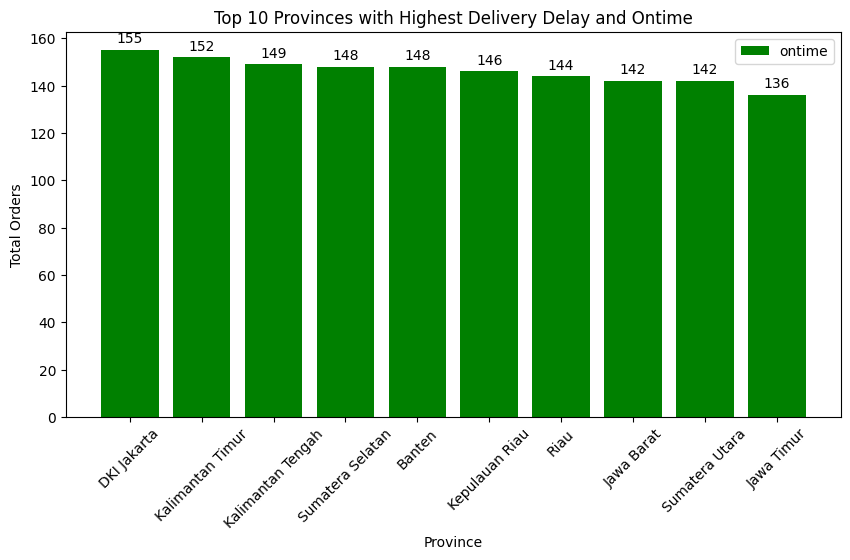

In [66]:
# Calculate 'ontime' for each province
df_ontime = df[df['Reached_on_time'] == '0']

# Group by Province and count the ontime and delay
df_ontime = df_ontime.groupby('Province', as_index=False).agg(ontime=('Reached_on_time', 'count'))

# Sort by 'ontime' and 'delivery_delay' in descending order
df_ontime = df_ontime.sort_values(by='ontime', ascending=False)

# Select the top 10 provinces
top_10_ontime = df_ontime.head(10)

# Create bar graphs and display numbers
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35

bar1 = ax.bar(top_10_ontime['Province'], top_10_ontime['ontime'], label='ontime', color='green')

# Displays a number above each bar
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

ax.set_xlabel('Province')
ax.set_ylabel('Total Orders')
ax.set_title('Top 10 Provinces with Highest Delivery Delay and Ontime')
ax.set_xticks(range(len(top_10_ontime['Province'])))
ax.set_xticklabels(top_10_ontime['Province'], rotation=45)
ax.legend()

plt.show()


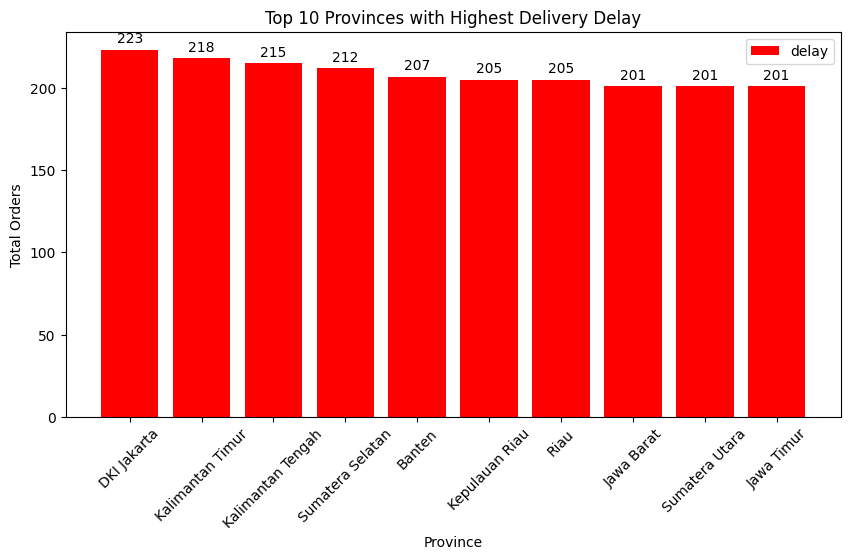

In [67]:
# Calculate 'ontime' for each province
df_delivery_delay = df[df['Reached_on_time'] == '1']

# Group by Province and count the ontime and delay
df_delivery_delay = df_delivery_delay.groupby('Province', as_index=False).agg(delay=('Reached_on_time', 'count'))

# Sort by 'delivery_delay' in descending order
df_delivery_delay = df_delivery_delay.sort_values(by='delay', ascending=False)

# Select the top 10 provinces
top_10_delay = df_delivery_delay.head(10)

# Create bar graphs and display numbers
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35

bar1 = ax.bar(top_10_delay['Province'], top_10_delay['delay'], label='delay', color='red')

# Displays a number above each bar
for bars in [bar1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

ax.set_xlabel('Province')
ax.set_ylabel('Total Orders')
ax.set_title('Top 10 Provinces with Highest Delivery Delay')
ax.set_xticks(range(len(top_10_ontime['Province'])))
ax.set_xticklabels(top_10_ontime['Province'], rotation=45)
ax.legend()

plt.show()


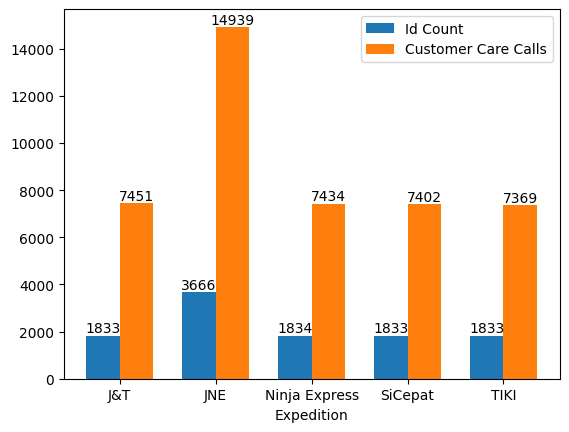

In [68]:
# Create a DataFrame df_Customer_care_calls
df_Customer_care_calls = df.groupby('Expedition', as_index=False).agg(id_cnt=('ID', 'nunique'), Customer_care_calls=('Customer_care_calls', 'sum'))

# Separating data
expeditions = df_Customer_care_calls['Expedition']
id_cnt = df_Customer_care_calls['id_cnt']
customer_care_calls = df_Customer_care_calls['Customer_care_calls']

# Set the bar width
bar_width = 0.35
x = range(len(expeditions))

# Create graphs
plt.bar(x, id_cnt, width=bar_width, label='Id Count', align='center')
plt.bar([i + bar_width for i in x], customer_care_calls, width=bar_width, label='Customer Care Calls', align='center')

# Aded number labels above the bars
for i, v in enumerate(id_cnt):
    plt.text(i, v, str(v), ha='center', va='bottom')
for i, v in enumerate(customer_care_calls):
    plt.text(i + bar_width, v, str(v), ha='center', va='bottom')

# Set labels on the x-axis
plt.xlabel('Expedition')
plt.xticks([i + bar_width / 2 for i in x], expeditions)
plt.legend()
plt.show()


<Axes: xlabel='Expedition', ylabel='count'>

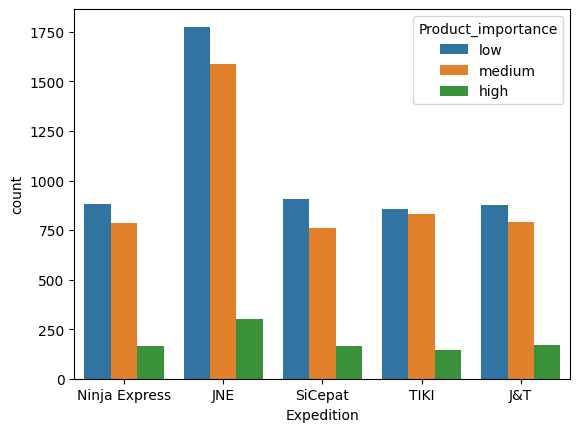

In [78]:
sns.countplot(data=df,
            x='Expedition',
            hue='Product_importance')

The highest product importance is at the low categorie and is followed by medium categorie with not too much difference, while the lowest is at the high categorie.

<Axes: xlabel='Expedition', ylabel='count'>

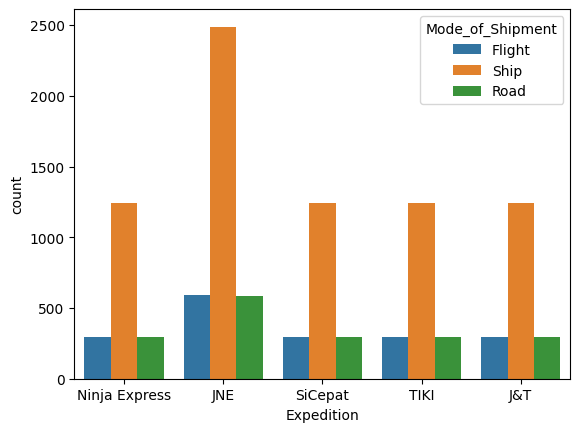

In [76]:
sns.countplot(data=df,
            x='Expedition',
            hue='Mode_of_Shipment')

The mode of delivery of goods for flight and road has the same percentage value, while the highest mode of delivery of goods is via ship with quite a large difference in value.

<ipython-input-70-144812dad287>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True)


<Axes: >

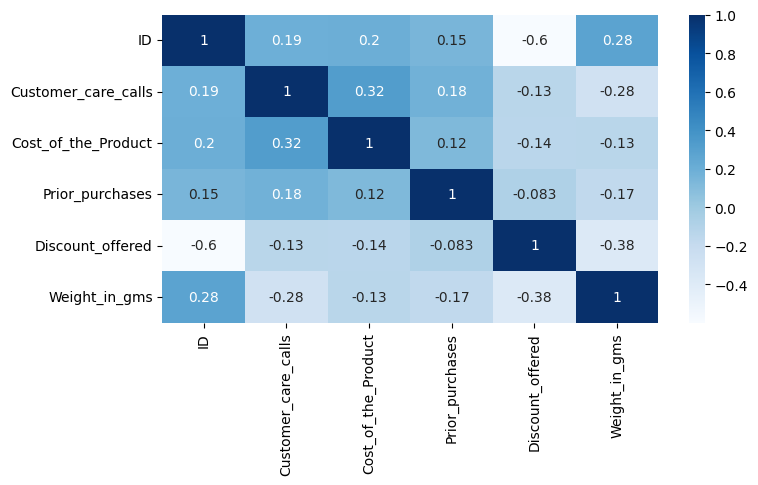

In [70]:
#  Correlation Matrix
fig = plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

Observation:
1. Based on the correlation results, the one that has the strongest relationship is between Discount_offered and Weight_in_gms with a result of -0.38 which influence each other in reverse
2. Apart from that, there is also a variable relationship between Customer_care_calls and Cost_of_the_Product with a result of 0.32 which influence each other in the same direction



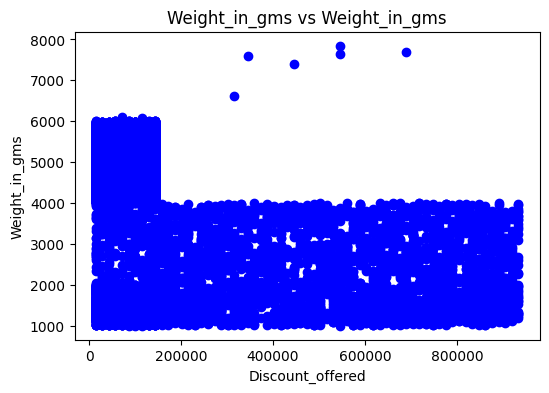

In [80]:
df_reached = df[df['Reached_on_time'].str.contains('1|0')]
fig = plt.figure(figsize=(6, 4))
plt.scatter(df_reached['Discount_offered'], df_reached['Weight_in_gms'], c='blue', marker='o')
plt.xlabel('Discount_offered')
plt.ylabel('Weight_in_gms')
plt.title('Weight_in_gms vs Weight_in_gms')
plt.show()

Observation:
1. In the distribution of data, it can be seen that items weighing 4000-6000 do not have a discount of >150 K

<ipython-input-72-4ae2958991f2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[features[i]], color='#aa182c')
<ipython-input-72-4ae2958991f2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[features[i]], color='#aa182c')
<ipython-input-72-4ae2958991f2>:6: UserWarning: 

`distplot` i

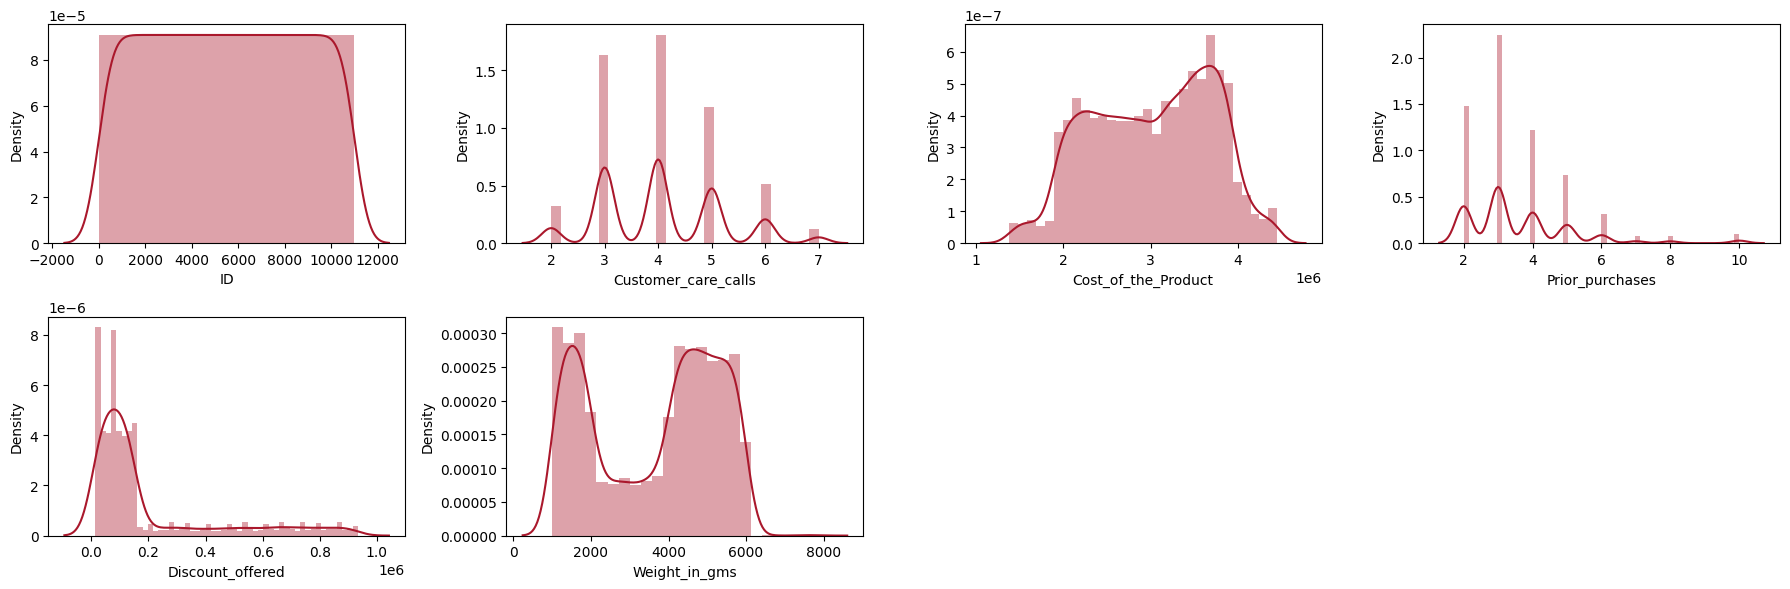

In [72]:
plt.figure(figsize=(18,6))

features = numericals
for i in range(len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='#aa182c')
    plt.xlabel(features[i])
    plt.tight_layout()

## Conclusion
1. Delays in delivery occur more often than on-time delivery
2. Customer rating in categories 1 - 3 which has a high percentage indicates that the level of customer satisfaction is still low, therefore there is a need to improve service in terms of delivery and service provided to customers so that customer ratings increase
3. The highest mode of shipment on the ship route means the fleet must be increased or prioritized for the ship route
4. The customer care call value of 3 - 6 has a high total during the delivery process, therefore it is better to monitor the delivery when the customer care call has reached 3 times so that it arrives on time
5. Product_importance with a low category affects delivery so many experience delivery delays